In [ ]:
'''
Topic: Your task is to implement KNN algorithm to an Iris dataset.
Dataset: url = "https://archive.ics.uci.edu/ml/datasets/Iris" ,
https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

METHODOLOGY
Part 1: 
Read and parse the initial dataset
Load it into our pandas dataframe
Display the dataset with feature information
Part 2: 
Split our dataset into its attributes and labels
Preprocessing the data
Part 3:
Perform feature scaling
Training and Predictions
Evaluating the Algorithm

IMPLEMENTATION
To implement KNN you have to
a.Split data into a train and a test split (70% and 30% respectively).
b.Conduct two experiments with Number of neighbours  as 4 and 6.
c.Compare the classification accuracy of KNN with neighbour value 4 and 6 functions using the performance measures:
Accuracy score, precision score, recall score and confusion matrix
'''

In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
'''
#We can also import the iris dataset using the sklearn datasets
from sklearn.datasets import load_iris 
iris = load_iris()
X=iris.data[:,:4]
y=iris.target
print(X)
print(y)
'''

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Read dataset to pandas dataframe
irisdata= pd.read_csv(url, names=names)
# Display the dataset with feature information
irisdata.info()
irisdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Assign data from first four columns to X variable
X = irisdata.iloc[:, 0:4]
# Assign data from first fifth columns to y variable ('Class attribute')
y = irisdata.select_dtypes(include=[object])
print(type(y))
le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)
print(y)
y=np.ravel(y)
# unique values we have in our y array
#np.unique(y)

<class 'pandas.core.frame.DataFrame'>
     Class
0        0
1        0
2        0
3        0
4        0
..     ...
145      2
146      2
147      2
148      2
149      2

[150 rows x 1 columns]


In [4]:
# Create training and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=0) #30% test and 70% train

In [5]:
# perform feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Training and Predictions (Number of neighbours as 4)
classifier_four = KNeighborsClassifier(n_neighbors=4)
classifier_four.fit(X_train, y_train)
y_pred_four = classifier_four.predict(X_test)

In [7]:
# Evaluating the Algorithm for number of neighbours as 4
print('For number of neighbours as 4: \n')
predictions_train_four = classifier_four.predict(X_train)
print('Training predictions accuracy:',accuracy_score(predictions_train_four, y_train))
predictions_test_four = classifier_four.predict(X_test)
print('\nTesting predictions accuracy:',accuracy_score(predictions_test_four, y_test))
print('\nConfusion matrix:\n',confusion_matrix(y_test, y_pred_four)) 
print('\nClassification report:\n',classification_report(y_test, y_pred_four))
print('\nAccuracy Score on Confusion Matrix:',accuracy_score(y_test, y_pred_four)) 
print('Error Score on Confusion Matrix:',1-accuracy_score(y_test, y_pred_four))

For number of neighbours as 4: 

Training predictions accuracy: 0.9714285714285714

Testing predictions accuracy: 0.9777777777777777

Confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


Accuracy Score on Confusion Matrix: 0.9777777777777777
Error Score on Confusion Matrix: 0.022222222222222254


In [8]:
# Training and Predictions (Number of neighbours as 6)
classifier_six = KNeighborsClassifier(n_neighbors=6)
classifier_six.fit(X_train, y_train)
y_pred_six = classifier_six.predict(X_test)

In [9]:
# Evaluating the Algorithm for number of neighbours as 6
print('For number of neighbours as 6: \n')
predictions_train_six = classifier_six.predict(X_train)
print('Training predictions accuracy:',accuracy_score(predictions_train_six,y_train))
predictions_test_six = classifier_six.predict(X_test)
print('\nTesting predictions accuracy:',accuracy_score(predictions_test_six, y_test))
print('\nConfusion matrix:\n',confusion_matrix(y_test, y_pred_six)) 
print('\nClassification report:\n',classification_report(y_test, y_pred_six))
print('\nAccuracy Score on Confusion Matrix:',accuracy_score(y_test, y_pred_six)) 
print('Error Score on Confusion Matrix:',1-accuracy_score(y_test, y_pred_six))

For number of neighbours as 6: 

Training predictions accuracy: 0.9809523809523809

Testing predictions accuracy: 0.9777777777777777

Confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


Accuracy Score on Confusion Matrix: 0.9777777777777777
Error Score on Confusion Matrix: 0.022222222222222254


In [10]:
# Comparing Error Rate with the K Value 
# Calculating error for K values between 1 and 40
error=[]
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

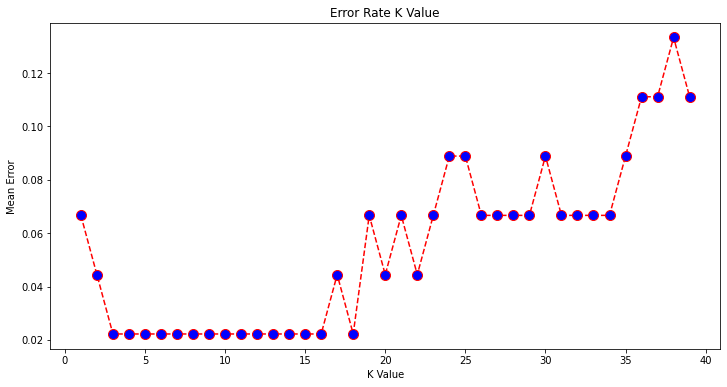

In [11]:
# Plot the error values against K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')